# Sketchbook for NLP Project

## Imports

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

from wordcloud import WordCloud

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a666/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Acquire

In [3]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...
...,...,...,...
107,fastai/courses,Jupyter Notebook,# Practical Deep Learning for Coders (fast.ai ...
108,Yorko/mlcourse.ai,Python,"<div align=""center"">\n\n![ODS stickers](https:..."
109,jtoy/awesome-tensorflow,None,# Awesome TensorFlow [![Awesome](https://cdn....
110,nlintz/TensorFlow-Tutorials,Jupyter Notebook,# TensorFlow-Tutorials\n[![Build Status](https...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             112 non-null    object
 1   language         101 non-null    object
 2   readme_contents  112 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [5]:
df[df.language.isna()]

,repo,language,readme_contents
54,Greenstand/Development-Overview,None,# Welcome to Greenstand's Treetracker project\...
68,Data4Democracy/ethics-resources,None,# Global Data Ethics Pledge (GDEP)\n---\n\n## ...
81,jbhuang0604/awesome-computer-vision,None,\n# Awesome Computer Vision: [![Awesome](https...
85,beamandrew/medical-data,None,# Medical Data for Machine Learning\nThis is a...
86,src-d/awesome-machine-learning-on-source-code,None,# Awesome Machine Learning On Source Code [![A...
88,keon/awesome-nlp,None,# 令人讚嘆的自然語言處理 [![Awesome](https://cdn.rawgit.c...
90,aikorea/awesome-rl,None,# Awesome Reinforcement Learning [![Awesome](...
102,gokceneraslan/awesome-deepbio,None,# Awesome DeepBio [![Awesome](https://cdn.rawg...
105,ujjwalkarn/Machine-Learning-Tutorials,None,\n# Machine Learning & Deep Learning Tutorials...
106,ChristosChristofidis/awesome-deep-learning,None,﻿# Awesome Deep Learning [![Awesome](https://c...


## Prepare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             112 non-null    object
 1   language         101 non-null    object
 2   readme_contents  112 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


Prepare the DataFrame with the text article title, original text, stemmed text, lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed. Also drops nulls.

In [7]:
df = prepare.prep_data(df, 'readme_contents')
df

,repo,language,readme_contents,stemmed,lemmatized,clean,stopwords_removed,doc_length,words
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movi applic for thi project we will be build a...,movie application for this project we will be ...,movie application project building single page...,361,423,"[movie, application, project, building, single..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel there are sever guid for kernel d...,linux kernel there are several guide for kerne...,linux kernel several guide kernel developer us...,39,71,"[linux, kernel, several, guide, kernel, develo..."
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...,imag http img shield io pypi v beet svg target...,image http img shield io pypi v beet svg targe...,image http img shield io pypi v beet svg targe...,191,532,"[image, http, img, shield, io, pypibeet, svg, ..."
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...,soundmanag javascript sound for the web by wra...,soundmanager javascript sound for the web by w...,soundmanager javascript sound web wrapping ext...,305,614,"[soundmanager, javascript, sound, web, wrappin..."
5,CreateJS/SoundJS,JavaScript,# SoundJS\r\n\r\nSoundJS is a library to make ...,soundj soundj is a librari to make work with a...,soundjs soundjs is a library to make working w...,soundjs soundjs library make working audio web...,155,355,"[soundjs, soundjs, library, make, working, aud..."
...,...,...,...,...,...,...,...,...,...
104,josephmisiti/awesome-machine-learning,Python,# Awesome Machine Learning [![Awesome](https:/...,awesom machin learn awesom http cdn rawgit com...,awesome machine learning awesome http cdn rawg...,awesome machine learning awesome http cdn rawg...,3809,18096,"[awesome, machine, learning, awesome, http, cd..."
107,fastai/courses,Jupyter Notebook,# Practical Deep Learning for Coders (fast.ai ...,practic deep learn for coder fast ai cours the...,practical deep learning for coder fast ai cour...,practical deep learning coder fast ai course l...,59,82,"[practical, deep, learning, coder, fast, ai, c..."
108,Yorko/mlcourse.ai,Python,"<div align=""center"">\n\n![ODS stickers](https:...",div align center od sticker http github com yo...,div align center od sticker http github com yo...,div align center od sticker http github com yo...,194,2061,"[div, align, center, od, sticker, http, github..."
110,nlintz/TensorFlow-Tutorials,Jupyter Notebook,# TensorFlow-Tutorials\n[![Build Status](https...,tensorflow tutori build statu http travi ci or...,tensorflow tutorial build status http travis c...,tensorflow tutorial build status http travis c...,10,142,"[tensorflow, tutorial, build, status, http, tr..."


Summarize data

In [8]:
df.language.value_counts()

JavaScript          28
Python              17
Ruby                12
HTML                10
C++                  8
Jupyter Notebook     6
CSS                  4
TypeScript           3
Scala                2
C#                   2
C                    2
Java                 2
Name: language, dtype: int64

Split into train, validate, and test.

In [9]:
train, validate = train_test_split(df, stratify=df.language, test_size=.2, random_state=123)

In [10]:
train.shape

(76, 9)

In [11]:
train.language.value_counts()

JavaScript          22
Python              13
Ruby                 9
HTML                 8
C++                  6
Jupyter Notebook     5
CSS                  3
Scala                2
C#                   2
C                    2
Java                 2
TypeScript           2
Name: language, dtype: int64

In [12]:
validate.shape

(20, 9)

In [13]:
validate.language.value_counts()

JavaScript          6
Python              4
Ruby                3
HTML                2
C++                 2
CSS                 1
Jupyter Notebook    1
TypeScript          1
Name: language, dtype: int64

In [14]:
# create series objects for each top_code_clean that is a string of words joined on spaces to make it 1 continious string  
javascript_words = ' '.join(df[df.language=='JavaScript'].clean)
python_words = ' '.join(df[df.language=='Python'].clean)
ruby_words = ' '.join(df[df.language=='Ruby'].clean)
html_words = ' '.join(df[df.language=='HTML'].clean)
c_plus_plus_words = ' '.join(df[df.language=='C++'].clean)
all_words = ' '.join(df.clean)

## Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

### What are the most common words in READMEs?

In [15]:
javascript_df = pd.DataFrame(javascript_words.split())
python_df = pd.DataFrame(python_words.split())
ruby_df = pd.DataFrame(ruby_words.split())
html_df = pd.DataFrame(html_words.split())
c_plus_plus_df = pd.DataFrame(c_plus_plus_words.split())
all_words_df = pd.DataFrame(all_words.split())

In [19]:
javascript_df

,0
0,movie
1,application
2,project
3,building
4,single
...,...
13189,data
13190,repository
13191,available
13192,public


In [22]:
javascript_freq = javascript_df.value_counts()
python_freq = python_df.value_counts()
ruby_freq = ruby_df.value_counts()
html_freq = html_df.value_counts()
c_plus_plus_freq = c_plus_plus_df.value_counts()
all_freq = all_words_df.value_counts()

javascript_freq.head()

http         558
com          409
github       219
bootstrap    151
alex         132
dtype: int64

In [25]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, ruby_freq, html_freq, c_plus_plus_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'ruby', 'html', 'c_plus_plus'], axis=1, inplace=False) 
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
',45,23,9,7,4,2
0,9,2,0,0,1,0
00,9,0,8,0,0,0
000,10,0,1,0,3,0
000000,6,0,6,0,0,0


### What are the most frequently occuring words?

In [26]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
http,3219,558,1546,275,104,380
com,2130,409,1099,162,47,188
github,1448,219,933,83,31,57
org,729,78,286,111,37,160
learning,551,3,529,3,0,10
data,506,45,284,24,105,17
machine,445,4,423,2,2,8
www,358,58,153,34,19,71
python,351,3,264,0,3,34


### Are there any words that uniquely identify a language of a project?

In [29]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(3),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(3),
           word_counts[word_counts.ruby == 0].sort_values(by='html').tail(3),
           word_counts[word_counts.html == 0].sort_values(by='ruby').tail(3),
           word_counts[word_counts.c_plus_plus == 0].sort_values(by='javascript').tail(3),
           word_counts[word_counts.javascript == 0].sort_values(by='c_plus_plus').tail(3)])

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
network,152,0,128,0,1,5
bee,147,0,147,0,0,0
00s,331,0,331,0,0,0
npm,74,69,0,0,3,0
alex,132,132,0,0,0,0
bootstrap,155,151,0,4,0,0
censusreporter,55,0,0,0,55,0
chart,65,1,4,0,56,3
profile,64,0,1,0,59,2


### Visualization

Text(0.5, 1.0, 'Proportion of Javascript vs Python for the 20 most common words')

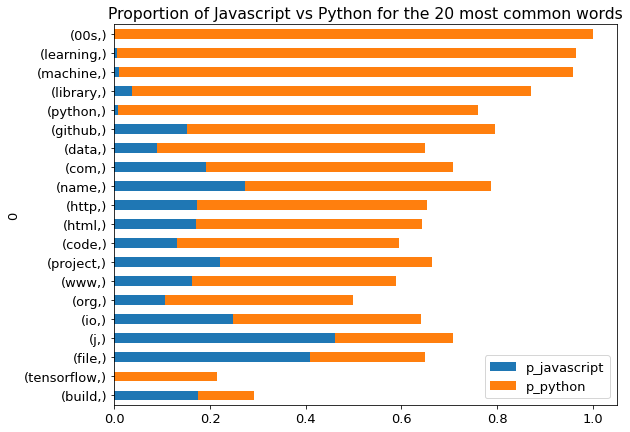

In [34]:
# figure out the percentage of javascript vs python
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Javascript vs Python for the 20 most common words')

Text(0.5, 1.0, 'Proportion of Language for the 20 most common words')

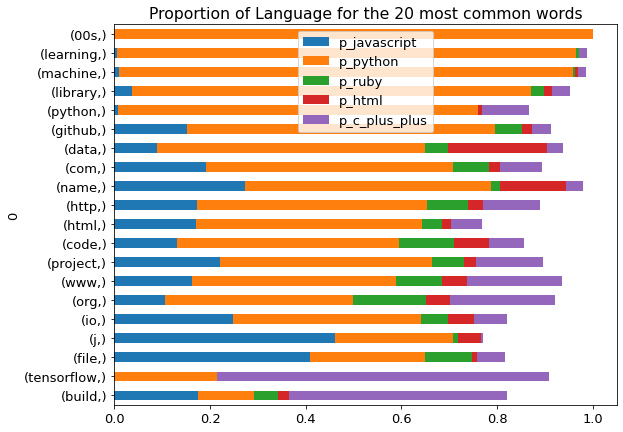

In [36]:
# figure out the percentage of language
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_ruby=word_counts.ruby / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_c_plus_plus=word_counts.c_plus_plus / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_ruby', 'p_html', 'p_c_plus_plus']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Language for the 20 most common words')

### Word Clouds

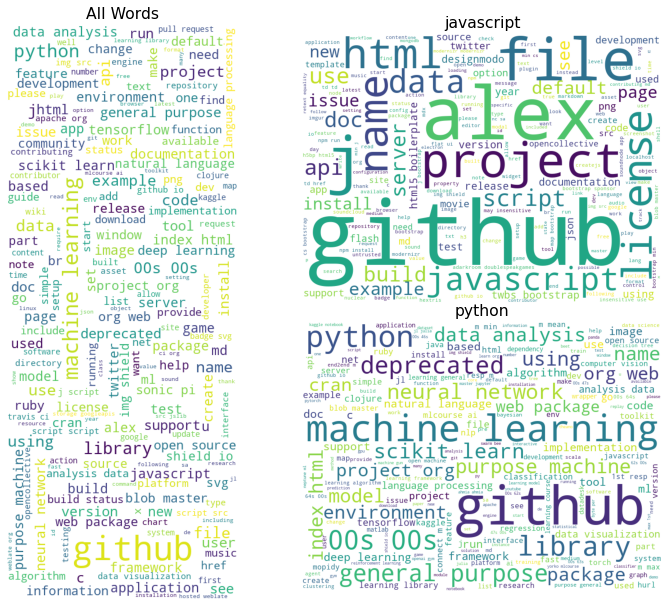

In [45]:
all_cloud = WordCloud(background_color='white', height=1000, width=400, margin=2).generate(all_words)
javascript_cloud = WordCloud(background_color='white', height=600, width=800, margin=2).generate(javascript_words)
python_cloud = WordCloud(background_color='white', height=600, width=800, margin=2).generate(python_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(python_cloud)

axs[0].set_title('All Words')
axs[1].set_title('javascript')
axs[2].set_title('python')

for ax in axs: ax.axis('off')

## Model

## Conclusions and Takeaways